## <font color='orange'>        Análise Epidemiológica da Febre Amarela </font>


O dataset para essa análise foi retirado do site do Ministério da Saúde, orgão esse que por meio da Coordenação-Geral de Vigilância das Arboviroses (CGARB) do Departamento de Imunização e Doenças Transmissíveis (DEIDT) da Secretaria de Vigilância em Saúde (SVS), monitora, no âmbito do Sistema Nacional de Vigilância Epidemiológica da Febre Amarela (FA) as notificações dos casos, com o objetivo de analisar e comparar o casos entre humanos e primatas não-humanos (PNH) (macacos). Os dados são dos anos de 1994 a 2021 (humanos) e 2000 a 2021 (macacos). 

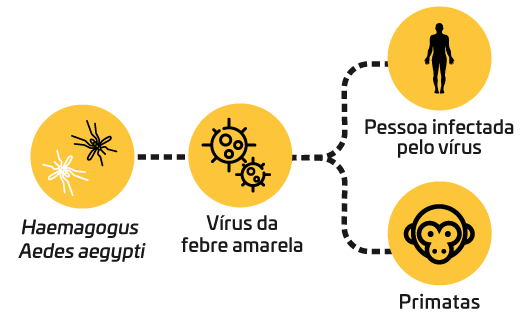

In [1]:
!pip install -q ipython-sql

In [2]:
import pandas as pd
import sqlite3

In [3]:
import sklearn

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [5]:
# Carregando a extensão SQL
%load_ext sql

In [6]:
# Definindo o banco de dados 
%sql sqlite:///FebreAmarela/fa_casoshumanos.db

In [7]:
# Carregando o dataset 
df = pd.read_csv('FebreAmarela/fa_casoshumanos.csv', encoding='iso-8859-1', delimiter=';')

In [8]:
df.shape

(2758, 14)

In [9]:
df.columns

Index(['ID', 'MACRORREG_LPI', 'COD_UF_LPI', 'UF_LPI', 'COD_MUN_LPI', 'MUN_LPI',
       'SEXO', 'IDADE', 'DT_IS', 'SE_IS', 'MES_IS', 'ANO_IS',
       'MONITORAMENTO_IS', 'OBITO'],
      dtype='object')

### Dataset casos em Humanos 

In [10]:
df.head()

,ID,MACRORREG_LPI,COD_UF_LPI,UF_LPI,COD_MUN_LPI,MUN_LPI,SEXO,IDADE,DT_IS,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO
0,1,N,14,RR,140005.0,Alto Alegre,M,NaN,29/11/1994,48.0,11.0,1994,1994/1995,SIM
1,2,N,14,RR,140045.0,Pacaraima,M,19,19/02/1995,8.0,2.0,1995,1994/1995,NÃO
2,3,NE,21,MA,210060.0,Amarante do Maranhão,M,32,01/04/1995,13.0,4.0,1995,1994/1995,IGN
3,4,NE,21,MA,210060.0,Amarante do Maranhão,M,33,03/04/1995,14.0,4.0,1995,1994/1995,SIM
4,5,N,15,PA,150270.0,Conceição do Araguaia,M,26,12/04/1995,15.0,4.0,1995,1994/1995,SIM


In [11]:
# Criando a conexão a um banco de dados SQLite
cnn = sqlite3.connect('FebreAmarela/fa_casoshumanos.db')

In [ ]:
# Importando o dataframe para dentro do banco de dados como tabela
df.to_sql('fa_casoshumanos', cnn)

In [13]:
%%sql

SELECT count(*) FROM fa_casoshumanos

 * sqlite:///FebreAmarela/fa_casoshumanos.db
Done.


count(*)
2758


#### Casos registrados em Humanos por Ano

In [14]:
%%sql

SELECT count(ID), ANO_is 
FROM fa_casoshumanos 
WHERE ANO_IS is not null 
GROUP BY ANO_IS

 * sqlite:///FebreAmarela/fa_casoshumanos.db
Done.


count(ID),ANO_IS
1,1994
4,1995
15,1996
3,1997
34,1998
76,1999
85,2000
41,2001
14,2002
66,2003


Text(0.5, 1.0, 'Quantidade de casos por Ano - Humanos')

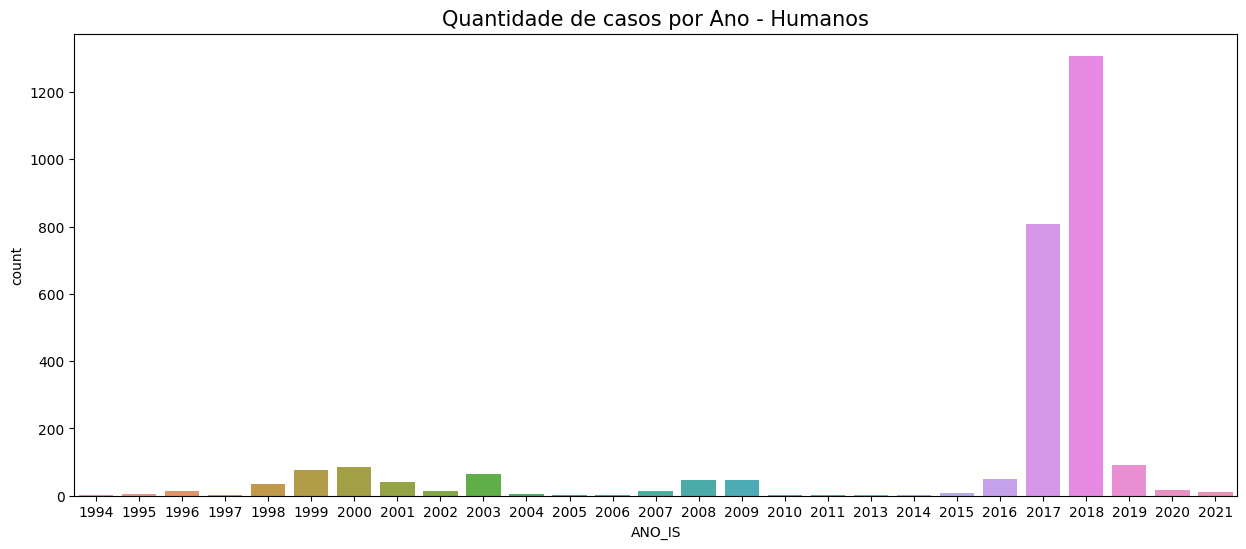

In [15]:
plt.figure(figsize = (15,6))
plt.subplot()
ax = sns.countplot(data = df, x = 'ANO_IS')
plt.title("Quantidade de casos por Ano - Humanos", fontsize = 15)


 Os anos com maior aumento de casos foram em 2017 com 807 casos e 2018 com 1308 casos. 
 
 Com o aumento de casos, em 2018 houve o maior registro de violência contra macacos de humanos que acreditavam que os animais era os responsáveis pela transmissão da doença.

#### Casos registrados por possível local (Estado) de infecção 

In [16]:
%%sql 

SELECT count(ID), UF_LPI 
FROM fa_casoshumanos 
WHERE UF_LPI is not null 
GROUP BY UF_LPI

 * sqlite:///FebreAmarela/fa_casoshumanos.db
Done.


count(ID),UF_LPI
2,AC
48,AM
10,BA
10,DF
258,ES
98,GO
2,MA
1098,MG
12,MS
27,MT


Text(0.5, 1.0, 'Quantidade de casos por local de provável infecção')

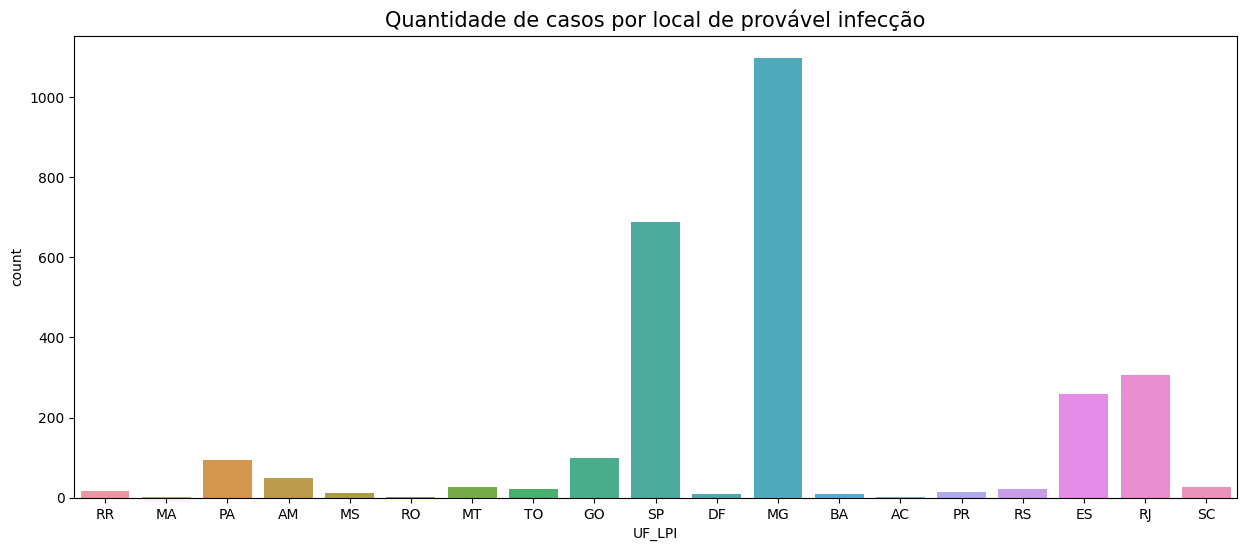

In [17]:
plt.figure(figsize = (15,6))
plt.subplot()
ax = sns.countplot(data = df, x = 'UF_LPI')
plt.title("Quantidade de casos por local de provável infecção", fontsize = 15)

#### Casos registrados por possível local (Macroregião) de infecção 

In [18]:
%%sql

SELECT count(ID), MACRORREG_LPI 
FROM fa_casoshumanos 
WHERE MACRORREG_LPI is not null 
GROUP BY MACRORREG_LPI 

 * sqlite:///FebreAmarela/fa_casoshumanos.db
Done.


count(ID),MACRORREG_LPI
147,CO
187,N
12,NE
62,S
2350,SE


#### Quantidade de casos registrados por mês 

In [19]:
%%sql

SELECT count(ID), MES_IS
FROM fa_casoshumanos
WHERE MES_IS is not null
GROUP BY MES_IS

 * sqlite:///FebreAmarela/fa_casoshumanos.db
Done.


count(ID),MES_IS
1280,1.0
614,2.0
392,3.0
182,4.0
49,5.0
25,6.0
11,7.0
8,8.0
9,9.0
4,10.0


Text(0.5, 1.0, 'Quantidade de casos por Mês')

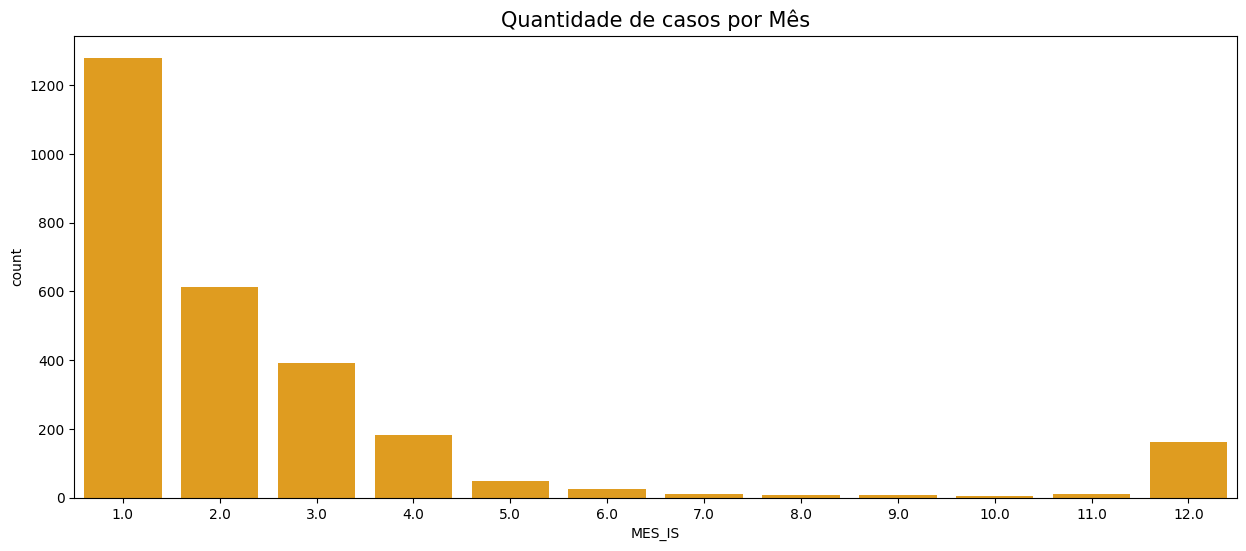

In [20]:
plt.figure(figsize = (15,6))
plt.subplot()
ax = sns.countplot(data = df, x = 'MES_IS', color = 'orange')
plt.title("Quantidade de casos por Mês", fontsize = 15)

 O ministério da Saúde informa que “a consolidação dos dados se dá sempre à época da vigência do monitoramento anual (julho a junho), uma vez que servem de subsídio à intensificação das ações durante o período sazonal de transmissão da FA (dezembro a maio)”, o período de sazonalidade é afirmado quando analisamos os dados em humanos e verificamos que os casos têm aumento nos 4 primeiros meses do ano. Entre todos os anos de análise do dataset foi verificado um total de 1280 casos no mês de janeiro, 614 no mês de fevereiro, 392 casos em março e 182 casos em abril. O mês de outubro, por exemplo, apresentou somente 4 casos de 1994 a 2021.

#### Quantidade de óbitos pela categoria 'Sexo'

In [21]:
%%sql

SELECT count(ID), SEXO, OBITO
FROM fa_casoshumanos
where (IDADE is not null and SEXO is not null and OBITO is not null) 
and (sexo="F" or sexo="M") and (obito="SIM") and IDADE <= 93
GROUP BY SEXO


 * sqlite:///FebreAmarela/fa_casoshumanos.db
Done.


count(ID),SEXO,OBITO
115,F,SIM
888,M,SIM




Foram contabilizados 2281 casos entre homens e 476 casos em mulheres, desses casos temos 115 mortes de mulheres e 888 mortes em homens; a idade média de mortes foi de 46 anos com 1003 mortes notificadas. 



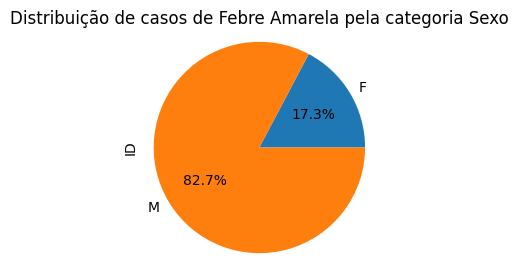

In [22]:
counts = df.groupby('SEXO').count()['ID']
plt.figure(figsize=(3, 3))
counts.plot.pie(autopct='%1.1f%%')
plt.axis('equal') 
colors = ['skyblue', 'lightcoral']
plt.title('Distribuição de casos de Febre Amarela pela categoria Sexo')
plt.show()

#### Quantidade de óbitos pela média de idade

In [23]:
%%sql

SELECT distinct count(OBITO) as qnt_obito, round(avg(IDADE)) as media_idade
FROM fa_casoshumanos
WHERE obito="SIM" and IDADE is not null and IDADE <= 93


 * sqlite:///FebreAmarela/fa_casoshumanos.db
Done.


qnt_obito,media_idade
1003,46.0


### Dataset casos em primatas - não humanos (macacos)

In [24]:
# Dataset dos casos em Macacos 
dfm = pd.read_csv('FebreAmarela/fa_casosmacacos.csv', encoding='iso-8859-1', delimiter=';')

In [ ]:
# Importando o dataframepara dentro do banco de dados
dfm.to_sql('fa_casosmacacos', cnn)

In [25]:
dfm.head()

,ID,MACRORREG_OCOR,COD_UF_OCOR,UF_OCOR,COD_MUN_OCOR,MUN_OCOR,DATA_OCOR,SE_OCOR,MES_OCOR,ANO_OCOR,MONITORAMENTO_OCOR
0,1,CO,52,GO,521100,ITAPIRAPUÃ,NaN,NaN,2.0,2000,1999/2000
1,2,CO,52,GO,521970,SANTA TEREZINHA DE GOIÁS,NaN,NaN,NaN,2000,1999/2000
2,3,CO,52,GO,521520,NOVO BRASIL,NaN,NaN,2.0,2000,1999/2000
3,4,SE,31,MG,310450,ARINOS,NaN,NaN,2.0,2000,1999/2000
4,5,SE,31,MG,310820,BONFINÓPOLIS DE MINAS,NaN,NaN,4.0,2000,1999/2000


In [26]:
%%sql

SELECT count(*) FROM fa_casosmacacos

 * sqlite:///FebreAmarela/fa_casoshumanos.db
Done.


count(*)
2421


 Foi visto que as ocorrências entres os anos de 1994 a 2021 foram contabilizadas em 2758 casos em humanos, já os macacos tiveram 2421 casos. Lembrando que os macacos começaram a ser notificados como portadores do vírus somente em 2000 (nesse dataset), não podendo correlacionar os dados de humanos e macacos como sendo proporcionais por ano.

#### Quantidade de casos registrados por ano

In [27]:
%%sql

SELECT distinct count(ID), ANO_OCOR
FROM fa_casosmacacos
WHERE ANO_OCOR is not null and ANO_OCOR is not null
GROUP BY ANO_OCOR
ORDER BY ANO_OCOR

 * sqlite:///FebreAmarela/fa_casoshumanos.db
Done.


count(ID),ANO_OCOR
5,2000
3,2001
2,2002
1,2003
13,2007
65,2008
155,2009
1,2014
22,2015
50,2016


Text(0.5, 1.0, 'Quantidade de casos por Ano - Macacos')

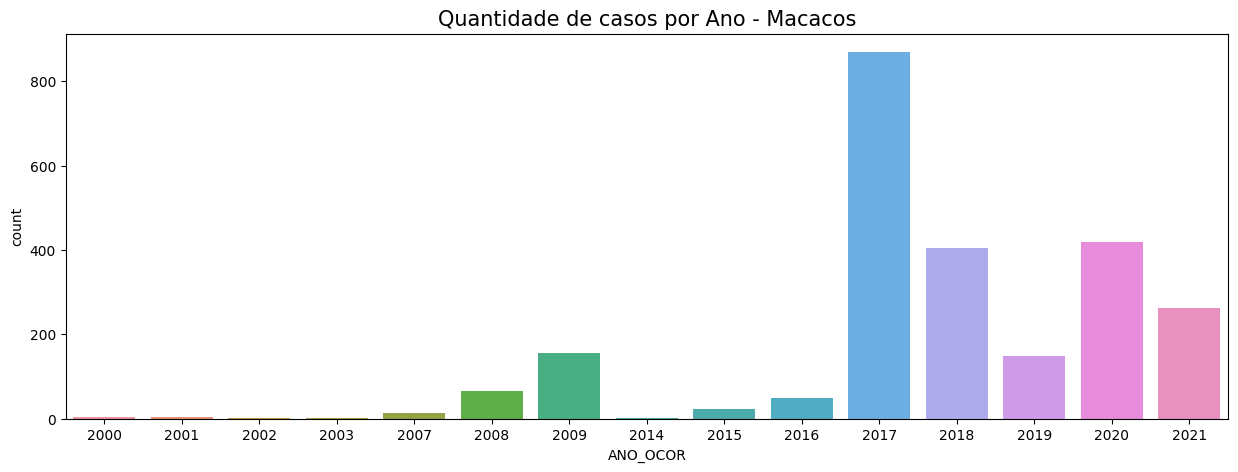

In [28]:
plt.figure(figsize = (15,5))
plt.subplot()
ax = sns.countplot(data = dfm, x = 'ANO_OCOR')
plt.title("Quantidade de casos por Ano - Macacos", fontsize = 15)

#### Quantidade de casos registrados por Estado 

In [29]:
%%sql 

SELECT count(ID), UF_OCOR 
FROM fa_casosmacacos
WHERE UF_OCOR is not null 
GROUP BY UF_OCOR

 * sqlite:///FebreAmarela/fa_casoshumanos.db
Done.


count(ID),UF_OCOR
1,AC
48,BA
27,DF
81,ES
73,GO
244,MG
2,MS
8,MT
22,PA
398,PR


Text(0.5, 1.0, 'Quantidade de casos por Estado')

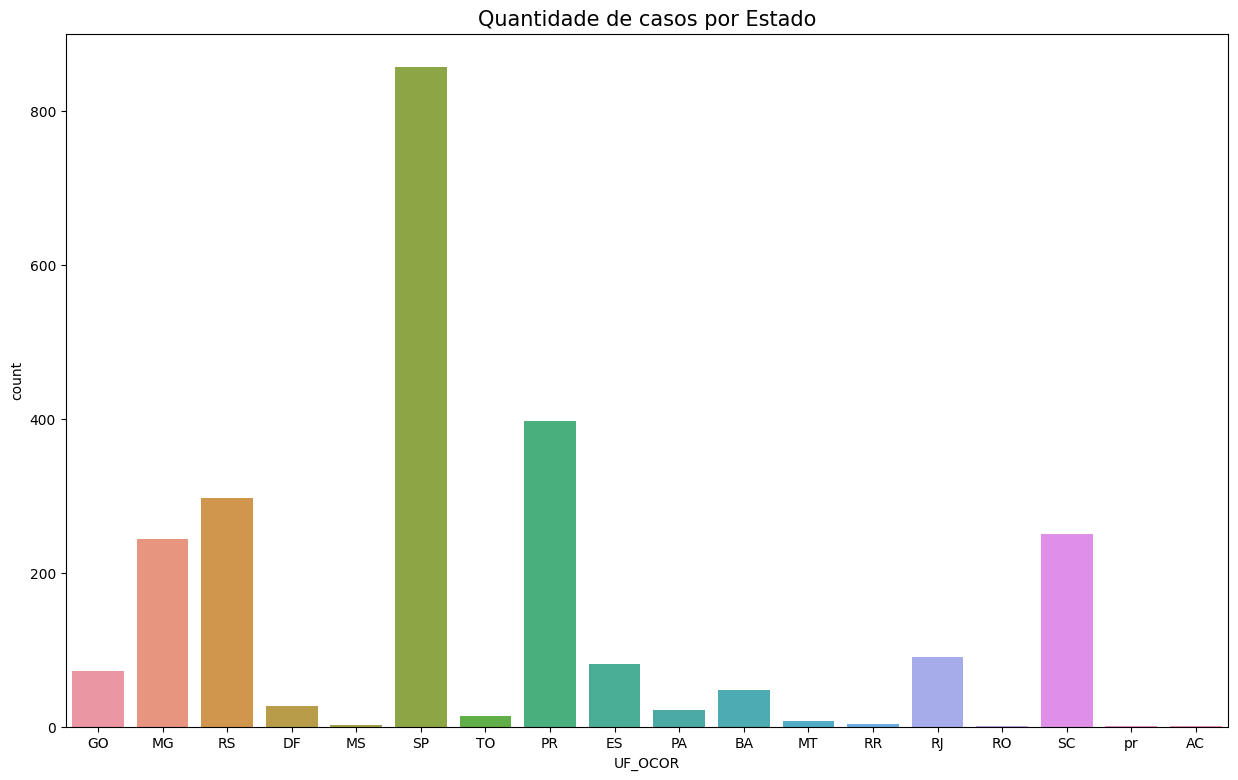

In [30]:
plt.figure(figsize = (15,9))
plt.subplot()
ax = sns.countplot(data = dfm, x = 'UF_OCOR')
plt.title("Quantidade de casos por Estado", fontsize = 15)

#### Comparação da quantidades e casos registrados entre Humanos e Macacos por ano

In [31]:
%%sql

SELECT
    *
FROM (
    SELECT
        count(ID) as count_human_id,
        ANO_IS as year
    FROM fa_casoshumanos
    WHERE ANO_IS is not null
    GROUP BY year
    ORDER BY year
) as H
JOIN (
    SELECT
        count(ID) as count_monkey_id,
        ANO_OCOR as year_monkey
    FROM fa_casosmacacos
    WHERE ANO_OCOR is not null
    GROUP BY year_monkey
    ORDER BY year_monkey
) as M on M.year_monkey = H.year
ORDER BY H.year, M.year_monkey

 * sqlite:///FebreAmarela/fa_casoshumanos.db
Done.


count_human_id,year,count_monkey_id,year_monkey
85,2000,5,2000
41,2001,3,2001
14,2002,2,2002
66,2003,1,2003
14,2007,13,2007
46,2008,65,2008
47,2009,155,2009
1,2014,1,2014
9,2015,22,2015
51,2016,50,2016


 Quando analisado por anos, como ponto de partida o ano 2000 também para humanos, os casos não seguem um padrão de aumento ou baixa entre os anos relacionando humanos e macacos, novamente não podendo levar somente esse dado como única relevância, uma vez que humanos obviamente serão mais notificados do que macacos, principalmente em regiões mais afastadas no país. Porém, analisando o dataset, chama atenção o ano de 2018 onde humanos tiveram 1308 ocorrências para 405 em macacos, e em 2019/2020 e 2021 os macacos tiveram um grande aumento sob as ocorrências notificadas em humanos. Como exemplo o ano de 2020 onde tivemos 418 ocorrências registradas em macacos para 18 em humanos. 
 
 É importante salientar o fato de haver vacina para humanos e está sendo usada em primatas não-humanos, porém com maior dificuldade de abrangência pela captura, local da vivência do animal etc. 

#### Comparação de casos registrados entre Humanos e Macacos por macroregião

In [32]:
%%sql

SELECT
*
from (
    select
  count(ID) as count_id,
  MACRORREG_LPI as macroreg_human

FROM fa_casoshumanos
group by MACRORREG_LPI
order by MACRORREG_LPI
) as H

JOIN (
    select
  count(ID) as count_id_monkey,
  MACRORREG_OCOR as macroreg_monkey

FROM fa_casosmacacos
group by macroreg_monkey
order by macroreg_monkey
) as M on M.macroreg_monkey= H.macroreg_human
order by H.macroreg_human, M.macroreg_monkey

 * sqlite:///FebreAmarela/fa_casoshumanos.db
Done.


count_id,macroreg_human,count_id_monkey,macroreg_monkey
147,CO,110,CO
187,N,42,N
12,NE,48,NE
62,S,947,S
2350,SE,1274,SE


Text(0.5, 1.0, 'Casos em Macacos por Macroregião')

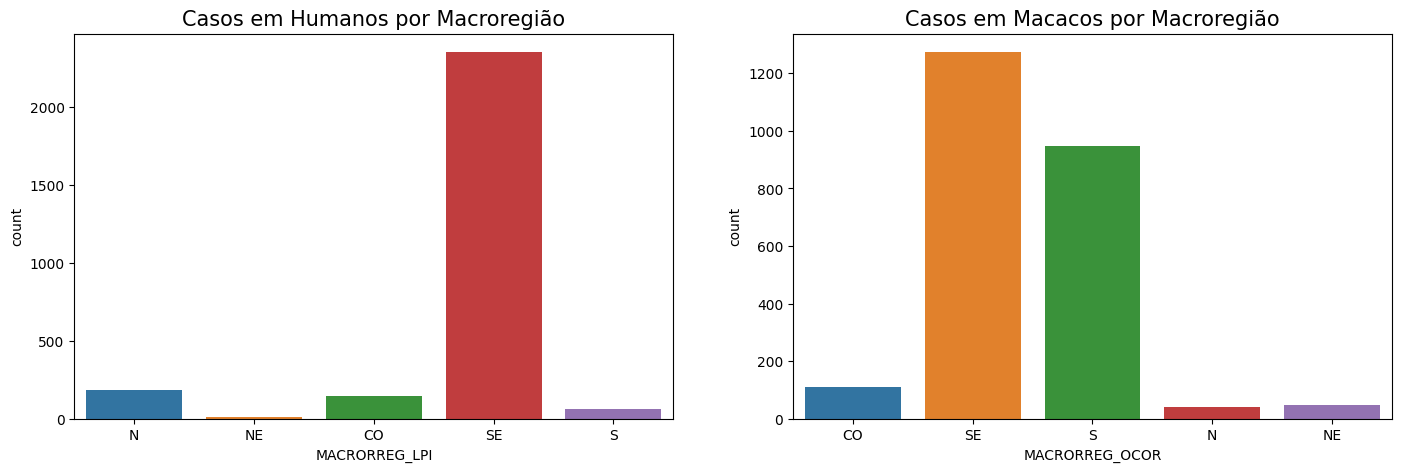

In [33]:
plt.figure(figsize = (17,(100)/20))

plt.subplot()

plt.subplot(121)
ax = sns.countplot(data = df, x = 'MACRORREG_LPI')
plt.title("Casos em Humanos por Macroregião", fontsize = 15)

plt.subplot(122)
ax = sns.countplot(data = dfm, x = 'MACRORREG_OCOR')
plt.title("Casos em Macacos por Macroregião", fontsize = 15)

Ao analisar por estados, os estados de ES, MG, RJ e SP apresentam registros em humanos de maiores casos entre os anos, já em macacos os estados de destaque são: MG, PR, RS, SC, SP.

Em macrorregiões vimos claramente que a região com maior ocorrência é a Sudeste, com 2350 casos em humanos e 1274 em macacos. 


IMPORTANTE: Macacos mortos são analisados em exames específicos para detectar se a causa morte foi Febre Amarela, o que aciona o alerta de cuidado com as pessoas.

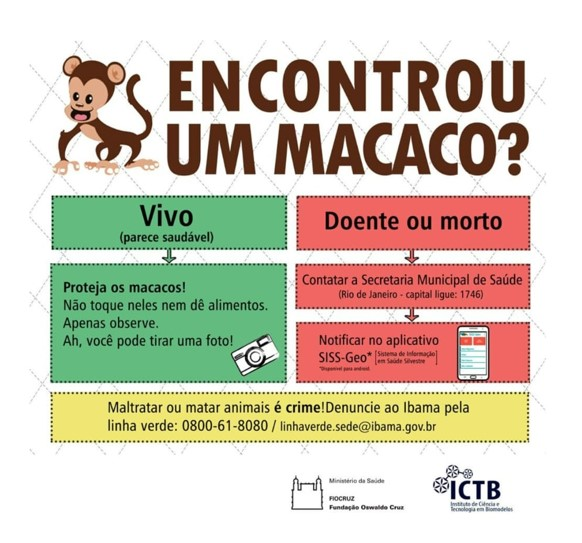

### Conclusão

A importância de analisarmos a correlação do aumento dos casos em macacos e humanos não se deve pela transmissão de uma para o outro (que não existe) e sim porque os macacos são grandes sentinelas para alerta de regiões onde o vírus da Febre Amarela está circulando. 

### Referências

Portal de Dados Abertos (dataset)
https://dados.gov.br/dados/conjuntos-dados/febre-amarela-em-humanos-e-primatas-no-humanos---1994-a-2021

Febre amarela | Secretaria da Saúde (saude.pr.gov.br)
https://www.saude.pr.gov.br/Pagina/Febre-amarela#:~:text=A%20febre%20amarela%20%C3%A9%20contagiosa,o%20v%C3%ADrus%20da%20febre%20amarela.

Febre amarela: vacina da Fiocruz é testada com sucesso em macacos (globo.com)
https://oglobo.globo.com/saude/vacina-e-saude/noticia/2023/04/febre-amarela-vacina-e-testada-com-sucesso-em-macacos-vitimados-por-epidemia-recente-da-doenca.ghtml

Morte de macacos prejudica prevenção e controle da febre amarela (fiocruz.br)
https://portal.fiocruz.br/noticia/morte-de-macacos-prejudica-prevencao-e-controle-da-febre-amarela

Jornal Nacional - Macacos são vítimas da falta de informação sobre febre amarela (globo.com) 
https://g1.globo.com/jornal-nacional/noticia/2018/01/macacos-sao-vitimas-da-falta-de-informacao-sobre-febre-amarela.html

Violência humana mata mais macacos que febre amarela   - Notícias - R7 Saúde 
https://noticias.r7.com/saude/violencia-humana-mata-mais-macacos-que-febre-amarela-29062022